In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns

In [52]:
def change_rank(x):
    return (-1*(x-32))+1

In [204]:
def clean_stats_rb(run_stats, dic_def):
    run_stats = run_stats.rename({'Unnamed: 7': 'Where'}, axis=1) 
    result = []
    points_home = []
    points_away = []
    for x in run_stats.Result:
        result.append(x[0])
        reg1 = re.findall(r'\d*[^-]', x)
        points_home.append(reg1[2])
        points_away.append(reg1[3])
    run_stats['Result'] = result
    run_stats['Points_Team'] = points_home
    run_stats['Points_Opp'] = points_away
    run_stats.Where.fillna('home', inplace=True)
    run_stats2 = run_stats.reset_index(drop=True)
    stadium = [] 
    for i, x in enumerate(run_stats2.Where):
        if x == 'home':
            stadium.append(1)
        else:
            stadium.append(0)
    run_stats2['Where'] = stadium
    dif_list = []
    for i, x in enumerate(run_stats2.Where):
        if x == 0:
            dif_list.append(dif_sta[run_stats2.Opp[i]]+32)
        else:
            dif_list.append(change_rank(dif_sta[run_stats2.Tm[i]]))
    run_stats2['Stad_Diff'] = dif_list
    run_stats3 = run_stats2.drop(['Lg', 'Tm', 'G#', 'Rk', 'Pos', 'Age', 'Att'], axis=1)
    run_stats3['Date'] = [x.month for x in run_stats3.Date]
    run_stats3['Date'] = run_stats3['Date'].map({9:'September', 10:'October', 11:'November', 12:'December'})
    run_stats3['Points_Team'] = pd.to_numeric(run_stats3.Points_Team, errors='coerce')
    run_stats3['Points_Opp'] = pd.to_numeric(run_stats3.Points_Opp, errors='coerce')
    run_stats3['Result'] = run_stats3.Result.map({'W':1, 'L':0, 'T':2})
    run_stats3['Opp'] = run_stats3['Opp'].map(dic_def)
    run_stats4 = run_stats3.set_index(['Week', 'Player'])
    run_stats5 = pd.get_dummies(run_stats4)
    return run_stats5

In [195]:
run_stats = pd.read_excel('../data/run/sportsref_rus1_18.xls')
for x in range(1,12):
    c = pd.read_excel(f'../data/run/sportsref_download ({x}).xls', skiprows=1)
    run_stats = pd.concat([run_stats, c], ignore_index = True, sort=False)

In [196]:
for x in range(1,12):
    c = pd.read_excel(f'../data/run/sportsref_download ({x}).xls', skiprows=1)
    run_stats = pd.concat([run_stats, c], ignore_index = True, sort=False)
  

In [197]:
run_stats.shape

(1857, 17)

In [63]:
run_stats.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Date', 'Lg', 'Tm', 'Unnamed: 7', 'Opp',
       'Result', 'G#', 'Week', 'Day', 'Att', 'Yds', 'Y/A', 'TD'],
      dtype='object')

In [64]:
run_stats.Week.min()

1

In [11]:
run_stats.head()

,Rk,Player,Pos,Age,Date,Lg,Tm,Unnamed: 7,Opp,Result,G#,Week,Day,Att,Yds,Y/A,TD
0,1,James Conner,RB,23.127,2018-09-09,NFL,PIT,@,CLE,T 21-21,1,1,Sun,31,135,4.35,2
1,2,Todd Gurley,RB,24.038,2018-09-10,NFL,LAR,@,OAK,W 33-13,1,1,Mon,20,108,5.40,0
2,3,Saquon Barkley,RB,21.212,2018-09-09,NFL,NYG,NaN,JAX,L 15-20,1,1,Sun,18,106,5.89,1
3,4,Isaiah Crowell,RB,25.245,2018-09-10,NFL,NYJ,@,DET,W 48-17,1,1,Mon,10,102,10.20,2
4,5,Lamar Miller,RB,27.137,2018-09-09,NFL,HOU,@,NWE,L 20-27,1,1,Sun,20,98,4.90,0


In [65]:
run_stats = run_stats.rename({'Unnamed: 7': 'Where'}, axis=1) 

In [66]:
run_stats.Pos.unique()

array(['RB', 'HB', 'QB', 'WR', 'FB', 'P', 'TE', 'LCB', 'CB', 'DE', 'S',
       'SS'], dtype=object)

In [198]:
run_stats = run_stats[(run_stats['Yds'] >= 10) & (run_stats['Att'] >= 3)]


In [205]:
run_stats1 = clean_stats_rb(run_stats, dif_run_def)

In [206]:
run_stats1.head()

Where  Opp  Result  Yds    Y/A  TD  Points_Team  \
Week Player                                                            
1    James Conner        0    5       2  135   4.35   2           21   
     Todd Gurley         0    3       1  108   5.40   0           33   
     Saquon Barkley      1   14       0  106   5.89   1           15   
     Isaiah Crowell      0   23       1  102  10.20   2           48   
     Lamar Miller        0   22       0   98   4.90   0           20   

                     Points_Opp  Stad_Diff  Date_December  Date_November  \
Week Player                                                                
1    James Conner            21         33              0              0   
     Todd Gurley             13         41              0              0   
     Saquon Barkley          20         28              0              0   
     Isaiah Crowell          17         46              0              0   
     Lamar Miller            27         64              0              0   

                     Date_October  Date_September  Day_Mon  Day_Sat  Day_Sun  \
Week Player                                                                    
1    James Conner               0               1        0        0        1   
     Todd Gurley                0               1        1        0        0   
     Saquon Barkley             0               1        0        0        1   
     Isaiah Crowell             0               1        1        0        0   
     Lamar Miller               0               1        0        0        1   

                     Day_Thu  
Week Player                   
1    James Conner          0  
     Todd Gurley           0  
     Saquon Barkley        0  
     Isaiah Crowell        0  
     Lamar Miller          0

In [42]:
run_stats.Pos.unique()

array(['RB', 'HB', 'QB', 'WR', 'TE', 'FB'], dtype=object)

In [68]:
result = []
points_home = []
points_away = []
for x in run_stats.Result:
    result.append(x[0])
    reg1 = re.findall(r'\d*[^-]', x)
    points_home.append(reg1[2])
    points_away.append(reg1[3])

In [69]:
run_stats['Result'] = result
run_stats['Points_Team'] = points_home
run_stats['Points_Opp'] = points_away

In [70]:
run_stats.Where.fillna('home', inplace=True)

In [71]:
run_stats2 = run_stats.reset_index()

In [72]:
stadium = [] 
for i, x in enumerate(run_stats2.Where):
    if x == 'home':
        stadium.append(1)
    else:
        stadium.append(0)
run_stats2['Where'] = stadium

In [73]:
dif_sta = {'TAM':6, 'GNB':21, 'NOR':26, 'KAN':31, 'BAL':18, 'WAS':15, 'NYJ':4, 'CIN':16, 'LAC':13, 'NWE':32, 'LAR':22,
           'MIN':29, 'IND':12, 'SEA':28, 'MIA':7, 'DEN':20, 'CAR':27, 'DAL':23, 'CHI':7, 'NYG':5, 'JAX':3, 'HOU':19,
           'OAK':9, 'PIT':30, 'ARI':17, 'ATL':24, 'BUF':10, 'CLE':1, 'PHI':25, 'DET':14, 'TEN':11, 'SFO':2}

In [74]:
dif_list = []
for i, x in enumerate(run_stats2.Where):
    if x == 0:
        dif_list.append(dif_sta[run_stats2.Opp[i]]+32)
    else:
        dif_list.append(change_rank(dif_sta[run_stats2.Tm[i]]))
run_stats2['Stad_Diff'] = dif_list

In [84]:
run_stats2.columns

Index(['index', 'Rk', 'Player', 'Pos', 'Age', 'Date', 'Lg', 'Tm', 'Where',
       'Opp', 'Result', 'G#', 'Week', 'Day', 'Att', 'Yds', 'Y/A', 'TD',
       'Points_Team', 'Points_Opp', 'Stad_Diff'],
      dtype='object')

In [90]:
run_stats3 = run_stats2.drop(['index', 'Lg', 'Tm', 'G#', 'Rk', 'Pos', 'Age'], axis=1)

In [91]:
run_stats3['Date'] = [x.month for x in run_stats3.Date]

In [93]:
run_stats3['Date'] = run_stats3['Date'].map({9:'September', 10:'October', 11:'November', 12:'December'})

In [96]:
run_stats3['Points_Team'] = pd.to_numeric(run_stats3.Points_Team, errors='coerce')
run_stats3['Points_Opp'] = pd.to_numeric(run_stats3.Points_Opp, errors='coerce')

In [98]:
run_stats3['Result'] = run_stats3.Result.map({'W':1, 'L':0, 'T':2})

In [103]:
dif_run_def = {'TAM':9, 'GNB':11, 'NOR':31, 'KAN':6, 'BAL':29, 'WAS':16, 'NYJ':7, 'CIN':4, 'LAC':24, 'NWE':22, 'LAR':10,
           'MIN':18, 'IND':25, 'SEA':20, 'MIA':2, 'DEN':12, 'CAR':21, 'DAL':28, 'CHI':32, 'NYG':13, 'JAX':14, 'HOU':30,
           'OAK':3, 'PIT':27, 'ARI':1, 'ATL':8, 'BUF':17, 'CLE':5, 'PHI':26, 'DET':23, 'TEN':15, 'SFO':19}

In [104]:
run_stats3['Opp'] = run_stats3['Opp'].map(dif_run_def)

In [106]:
run_stats4 = run_stats3.set_index(['Week', 'Player'])

In [108]:
run_stats5 = pd.get_dummies(run_stats4)

In [207]:
corr_run = run_stats1.corr()

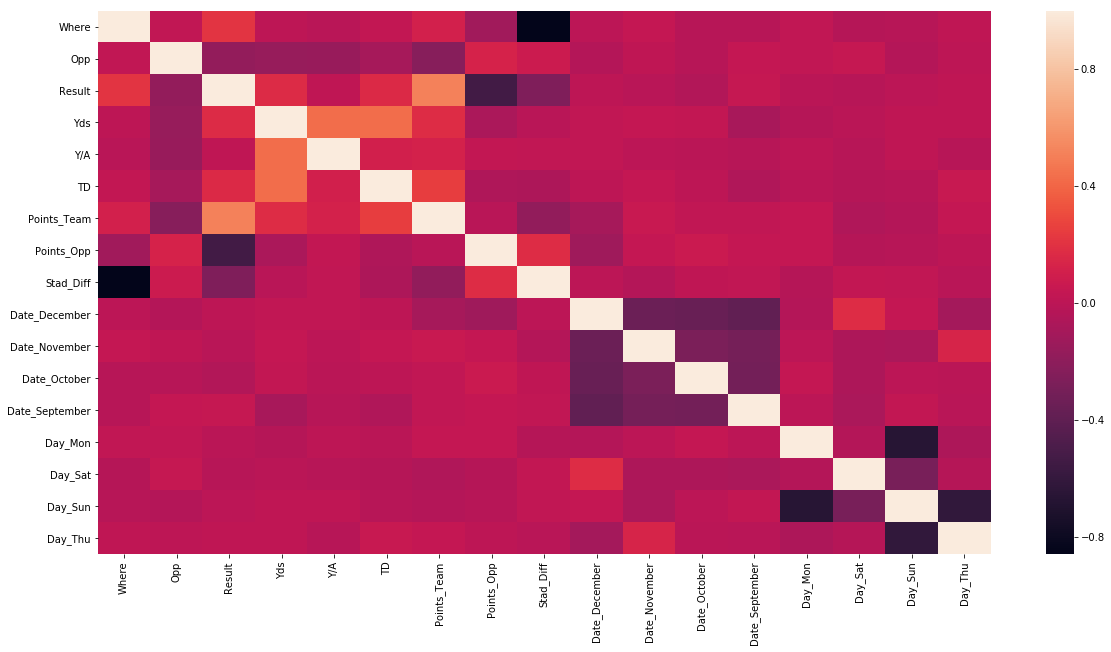

In [208]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.heatmap(corr_run, 
        xticklabels=corr_run.columns,
        yticklabels=corr_run.columns)

In [203]:
corr_run

,Where,Opp,Result,Att,Yds,Y/A,TD,Points_Team,Points_Opp,Stad_Diff,Date_December,Date_November,Date_October,Date_September,Day_Mon,Day_Sat,Day_Sun,Day_Thu
Where,1.000000,0.019971,0.212272,0.016289,0.010506,-0.016821,0.031206,0.112461,-0.117187,-0.860341,0.003792,0.036876,-0.021523,-0.018076,0.026115,-0.026391,-0.019183,0.013364
Opp,0.019971,1.000000,-0.174676,-0.071164,-0.159381,-0.150126,-0.096179,-0.222298,0.124849,0.074080,-0.035303,0.018503,-0.018996,0.038320,0.023327,0.041828,-0.038170,0.010796
Result,0.212272,-0.174676,1.000000,0.176685,0.168494,0.015463,0.161339,0.511336,-0.534497,-0.258674,0.011667,-0.017092,-0.040958,0.042807,-0.004790,-0.020399,0.000726,0.014084
Att,0.016289,-0.071164,0.176685,1.000000,0.757119,-0.149023,0.398036,0.105822,-0.101949,-0.023729,0.012301,0.026265,0.024940,-0.061584,-0.045871,0.024388,0.013025,0.017823
Yds,0.010506,-0.159381,0.168494,0.757119,1.000000,0.431456,0.428113,0.172439,-0.073352,-0.017354,0.022054,0.040575,0.027732,-0.088059,-0.028220,-0.002916,0.013124,0.012240
Y/A,-0.016821,-0.150126,0.015463,-0.149023,0.431456,1.000000,0.101259,0.115616,0.029162,0.021325,0.020160,0.000869,-0.003973,-0.018448,0.008428,-0.021796,0.014162,-0.019178
TD,0.031206,-0.096179,0.161339,0.398036,0.428113,0.101259,1.000000,0.250672,-0.057060,-0.063264,0.005355,0.034978,0.008454,-0.046618,-0.007839,-0.029111,-0.019690,0.051745
Points_Team,0.112461,-0.222298,0.511336,0.105822,0.172439,0.115616,0.250672,1.000000,-0.011446,-0.182859,-0.096859,0.061905,0.022820,0.023023,0.038826,-0.051180,-0.037322,0.038728
Points_Opp,-0.117187,0.124849,-0.534497,-0.101949,-0.073352,0.029162,-0.057060,-0.011446,1.000000,0.174083,-0.125941,0.039083,0.065892,0.034182,0.036420,-0.026605,-0.024402,0.010152
Stad_Diff,-0.860341,0.074080,-0.258674,-0.023729,-0.017354,0.021325,-0.063264,-0.182859,0.174083,1.000000,-0.001350,-0.035756,0.012472,0.023082,-0.030233,0.030208,0.020510,-0.012798


In [177]:
run_stats6 = run_stats5.drop(['Result','Yds', 'Att', 
                   'Y/A', 'TD', 'Points_Opp'], axis=1)

In [178]:
run_stats6.head()

Where  Opp  Points_Team  Stad_Diff  Date_December  \
Week Player                                                              
1    James Conner        0    5           21         33              0   
     Todd Gurley         0    3           33         41              0   
     Saquon Barkley      1   14           15         28              0   
     Isaiah Crowell      0   23           48         46              0   
     Lamar Miller        0   22           20         64              0   

                     Date_November  Date_October  Date_September  Day_Mon  \
Week Player                                                                 
1    James Conner                0             0               1        0   
     Todd Gurley                 0             0               1        1   
     Saquon Barkley              0             0               1        0   
     Isaiah Crowell              0             0               1        1   
     Lamar Miller                0             0               1        0   

                     Day_Sat  Day_Sun  Day_Thu  
Week Player                                     
1    James Conner          0        1        0  
     Todd Gurley           0        0        0  
     Saquon Barkley        0        1        0  
     Isaiah Crowell        0        0        0  
     Lamar Miller          0        1        0

In [179]:
from sklearn.model_selection import train_test_split

In [180]:
y = run_stats6.Points_Team
X = run_stats6.drop('Points_Team', axis=1)

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [188]:
from sklearn.linear_model import LinearRegression

In [189]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
pred_run = linreg.predict(X_test)

In [190]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [191]:
mse = mean_squared_error(y_test, pred_run)
rmse = mse**(1/2)
mae = mean_absolute_error(y_test, pred_run)

In [192]:
print('rmse: ', rmse, '\n', 'mae:', mae)
#print(mse)

rmse:  9.90154995197421 
 mae: 7.834287354522446
